In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('../Project_datasets/features.csv')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 718 non-null    int64  
 1   date                       718 non-null    object 
 2   day_of_week                718 non-null    int64  
 3   is_weekend                 718 non-null    int64  
 4   day_of_month               718 non-null    int64  
 5   month                      718 non-null    int64  
 6   year                       718 non-null    int64  
 7   is_holiday                 718 non-null    int64  
 8   season                     718 non-null    int64  
 9   lag_1                      717 non-null    float64
 10  lag_2                      716 non-null    float64
 11  lag_7                      711 non-null    float64
 12  lag_14                     704 non-null    float64
 13  lag_month                  535 non-null    float64

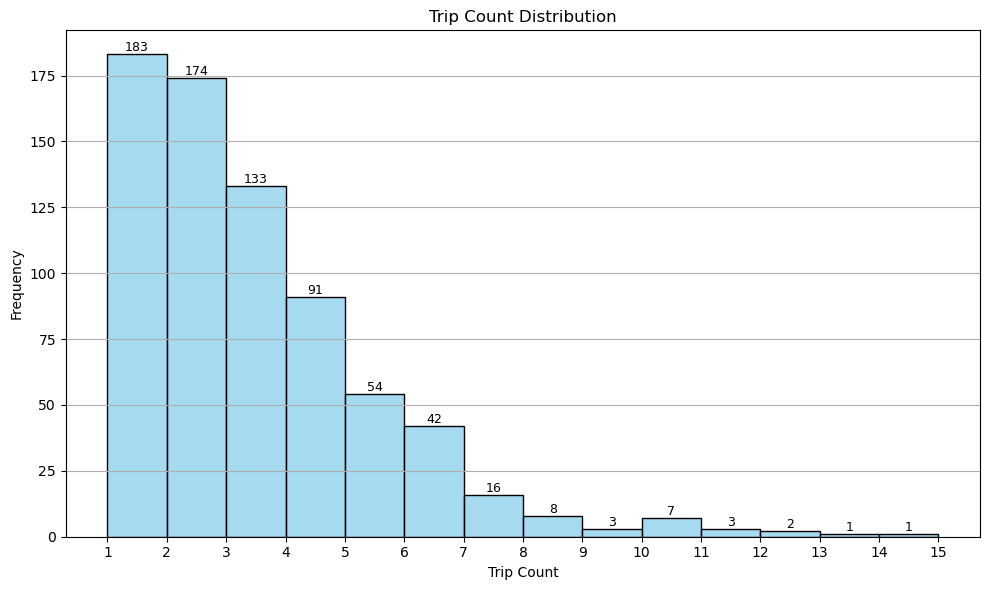

In [18]:

plt.figure(figsize=(10, 6))
ax = sns.histplot(data['trip_count'], bins=range(1, 16), kde=False, color='skyblue', edgecolor='black')

# Add count labels on top of bars
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.title('Trip Count Distribution')
plt.xlabel('Trip Count')
plt.ylabel('Frequency')
plt.xticks(range(1, 16))  # Set x-axis ticks for each trip count
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [19]:
data_cleaned = data.dropna(subset=['lag_1', 
                                 'lag_7', 
                                 'rolling_mean_3', 
                                 'lag_2', 
                                 'lag_14', 
                                'lag_month', 
                                'rolling_mean_3',
                                'rolling_std_7',
                                'rolling_max_7',
                                'rolling_mean_7_lag_7',])

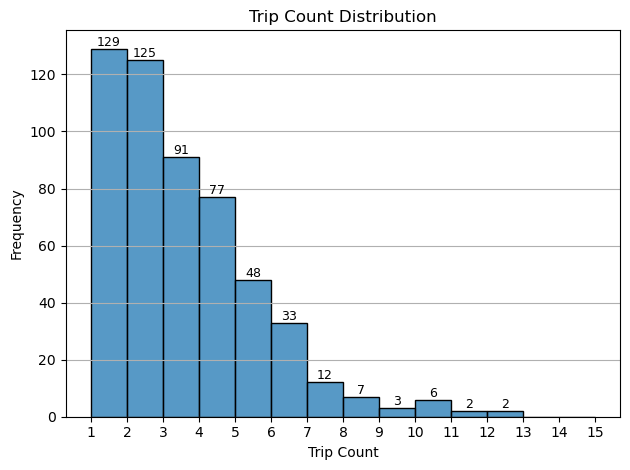

In [20]:
ax = sns.histplot(data_cleaned['trip_count'], bins=range(1, 16))

# Add count labels on top of bars
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.title('Trip Count Distribution')
plt.xlabel('Trip Count')
plt.ylabel('Frequency')
plt.xticks(range(1, 16))  # Set x-axis ticks for each trip count
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [21]:
correlation_matrix = data_cleaned .corr(numeric_only=True)

# View correlation of each feature with the target
feature_correlation = correlation_matrix['trip_count'].sort_values(ascending=False)
print(feature_correlation)

trip_count                   1.000000
trips_to_berri_all           0.220417
total_lag_7                  0.201052
total_trips_all_routes       0.195255
total_rolling_mean_3         0.175584
trips_from_mont_royal_all    0.158033
rolling_mean_3               0.145282
rolling_mean_7_lag_7         0.144115
lag_year                     0.113535
lag_14                       0.111407
rolling_max_7                0.099233
lag_1                        0.097335
day_of_week                  0.090741
rolling_std_7                0.076529
total_rolling_std_7          0.039527
year                         0.038800
lag_7                        0.030398
is_weekend                   0.026729
lag_2                        0.018621
Unnamed: 0                   0.013336
day_of_month                -0.014593
lag_month                   -0.015602
is_holiday                  -0.053112
season                      -0.114343
month                       -0.117552
Name: trip_count, dtype: float64


In [22]:
data_cleaned.to_csv('../Project_datasets/cleaned.csv')